# Loan Dataset - Initial Exploratory Data Analysis
---
This notebook performs initial EDA to:
- Understand the features
- Identify missing values
- Understand distribution of key variables (loan status, interest rate, applicant income)

## 1. Import Libraries and Load Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load dataset
df = pd.read_csv('../data/raw/sample.csv')  # Replace with your file path

print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape} (rows, columns)")

/var/folders/fp/5wj5hfvn6x9fd8jmprqz_4fm0000gn/T/ipykernel_44659/2591039365.py:11: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/sample.csv')  # Replace with your file path


Dataset loaded successfully!
Shape: (100000, 152) (rows, columns)


## 2. Understand the Features

In [5]:
# Display first few rows
print("First 5 rows:")
df.head()

First 5 rows:


,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1865410,3724788,NaN,14000.0,14000.0,14000.0,36 months,12.12,465.81,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,2150160,119908180,NaN,28000.0,28000.0,28000.0,60 months,18.06,711.94,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1059905,71754845,NaN,16000.0,16000.0,16000.0,60 months,9.75,337.99,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1448582,141461083,NaN,10400.0,10400.0,10375.0,60 months,16.14,253.69,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1995852,87032486,NaN,14000.0,14000.0,14000.0,60 months,13.99,325.69,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Dataset information
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 152 entries, Unnamed: 0 to settlement_term
dtypes: float64(113), int64(1), object(38)
memory usage: 116.0+ MB


In [7]:
# Basic statistics
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Unnamed: 0,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,settlement_amount,settlement_percentage,settlement_term
count,1.000000e+05,0.0,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,9.999800e+04,99932.000000,99997.000000,...,503.0,503.000000,503.0,503.000000,411.000000,503.000000,503.000000,1529.000000,1529.000000,1529.000000
mean,1.128987e+06,NaN,15051.827518,15045.926959,15027.156579,13.097322,446.026964,7.780700e+04,18.800020,0.302749,...,3.0,152.539364,3.0,14.489066,451.160365,11375.246183,196.834911,5018.161406,47.912459,13.207979
std,6.534322e+05,NaN,9196.414553,9194.412022,9200.219308,4.855124,267.872648,6.702646e+04,13.494123,0.860369,...,0.0,132.202699,0.0,9.826350,388.310433,7574.520931,209.398501,3669.115205,6.721127,8.105080
min,5.000000e+00,NaN,500.000000,500.000000,0.000000,5.310000,15.670000,0.000000e+00,0.000000,0.000000,...,3.0,3.730000,3.0,0.000000,11.190000,475.920000,0.020000,130.000000,20.000000,0.000000
25%,5.617958e+05,NaN,8000.000000,8000.000000,8000.000000,9.490000,251.580000,4.600000e+04,11.890000,0.000000,...,3.0,55.540000,3.0,7.000000,165.240000,5372.130000,44.315000,2329.000000,45.000000,6.000000
50%,1.127528e+06,NaN,12975.000000,12950.000000,12825.000000,12.620000,377.090000,6.500000e+04,17.820000,0.000000,...,3.0,116.280000,3.0,16.000000,353.610000,9685.450000,132.280000,4209.900000,45.010000,14.000000
75%,1.694967e+06,NaN,20000.000000,20000.000000,20000.000000,15.990000,593.360000,9.300000e+04,24.490000,0.000000,...,3.0,206.670000,3.0,23.000000,607.890000,16260.950000,286.885000,6636.000000,50.000000,18.000000
max,2.260663e+06,NaN,40000.000000,40000.000000,40000.000000,30.990000,1714.540000,6.998721e+06,999.000000,27.000000,...,3.0,828.980000,3.0,32.000000,2486.940000,34213.440000,1407.860000,28503.000000,95.130000,36.000000


## 3. Identify Missing Values

In [8]:
# Calculate missing values
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

# Filter only columns with missing values
missing_data = missing_data[missing_data['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

if len(missing_data) > 0:
    print("Missing Values Summary:")
    display(missing_data)
else:
    print("✓ No missing values found!")

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
member_id,member_id,100000,100.00
orig_projected_additional_accrued_interest,orig_projected_additional_accrued_interest,99589,99.59
hardship_dpd,hardship_dpd,99497,99.50
hardship_status,hardship_status,99497,99.50
deferral_term,deferral_term,99497,99.50
...,...,...,...
initial_list_status,initial_list_status,1,0.00
total_acc,total_acc,3,0.00
revol_bal,revol_bal,1,0.00
pub_rec,pub_rec,3,0.00


## 4. Distribution of Key Variables

### 4.1 Loan Status Distribution

Loan Status Distribution:
loan_status
Fully Paid                                             47308
Current                                                38948
Charged Off                                            12087
Late (31-120 days)                                       960
In Grace Period                                          374
Late (16-30 days)                                        195
Does not meet the credit policy. Status:Fully Paid        88
Does not meet the credit policy. Status:Charged Off       37
Default                                                    2
Name: count, dtype: int64

Percentages:
loan_status
Fully Paid                                             47.31
Current                                                38.95
Charged Off                                            12.09
Late (31-120 days)                                      0.96
In Grace Period                                         0.37
Late (16-30 days)                                       

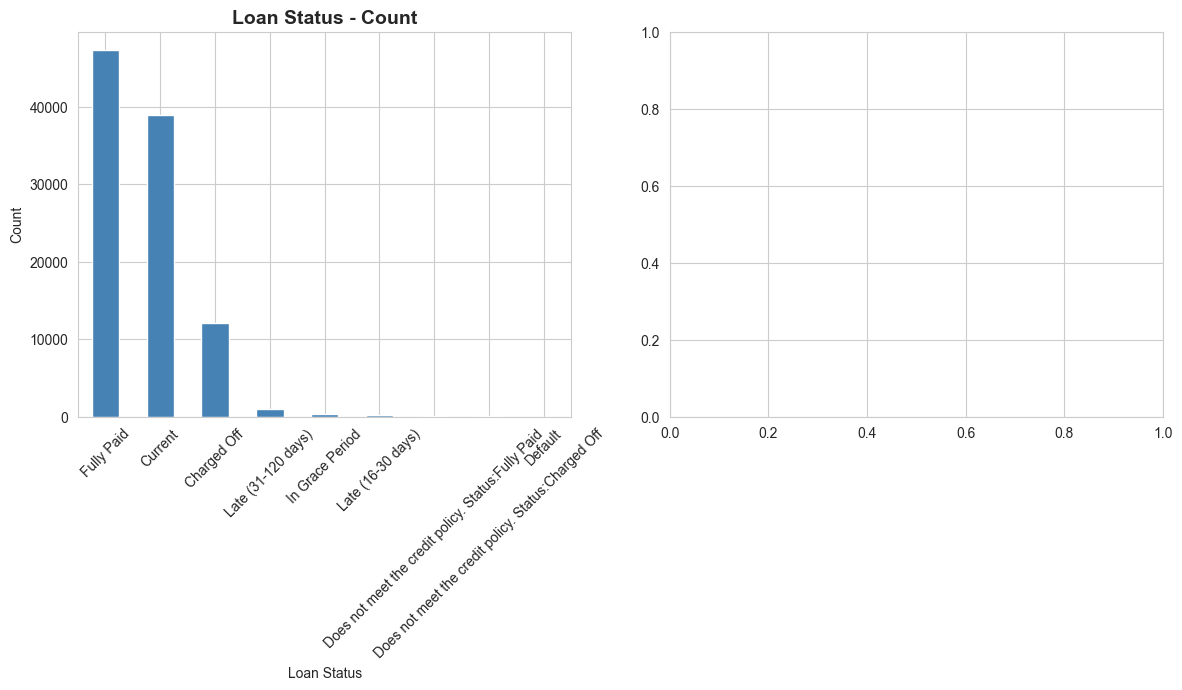

In [ ]:
# Replace 'loan_status' with your actual column name
loan_status_col = 'loan_status'

if loan_status_col in df.columns:
    print("Loan Status Distribution:")
    print(df[loan_status_col].value_counts())
    print("\nPercentages:")
    print(df[loan_status_col].value_counts(normalize=True).mul(100).round(2))
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    df[loan_status_col].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Loan Status - Count', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Loan Status')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{loan_status_col}' not found. Available columns: {df.columns.tolist()}")

### 4.2 Interest Rate Distribution

Interest Rate Statistics:
count    99999.000000
mean        13.097322
std          4.855124
min          5.310000
25%          9.490000
50%         12.620000
75%         15.990000
max         30.990000
Name: int_rate, dtype: float64


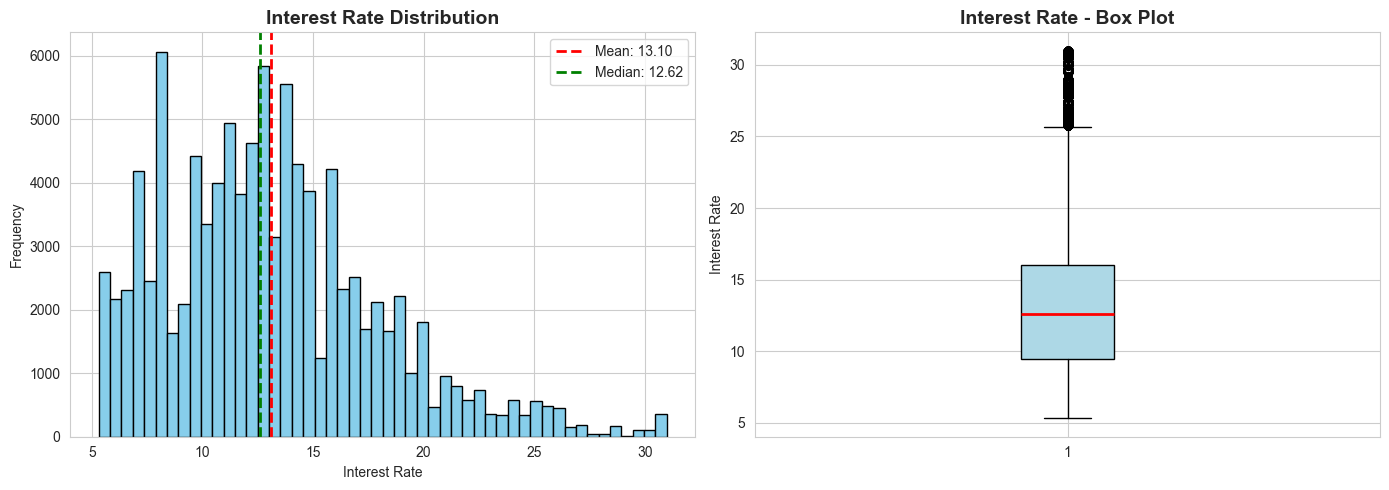

In [12]:
# Replace 'interest_rate' with your actual column name
interest_rate_col = 'int_rate'

if interest_rate_col in df.columns:
    print("Interest Rate Statistics:")
    print(df[interest_rate_col].describe())
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df[interest_rate_col].dropna(), bins=50, color='skyblue', edgecolor='black')
    axes[0].axvline(df[interest_rate_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[interest_rate_col].mean():.2f}')
    axes[0].axvline(df[interest_rate_col].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df[interest_rate_col].median():.2f}')
    axes[0].set_title('Interest Rate Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Interest Rate')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(df[interest_rate_col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor='lightblue'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Interest Rate - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Interest Rate')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{interest_rate_col}' not found. Available columns: {df.columns.tolist()}")

### 4.3 Applicant Income Distribution

Applicant Income Statistics:
count    9.999800e+04
mean     7.780700e+04
std      6.702646e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      6.998721e+06
Name: annual_inc, dtype: float64


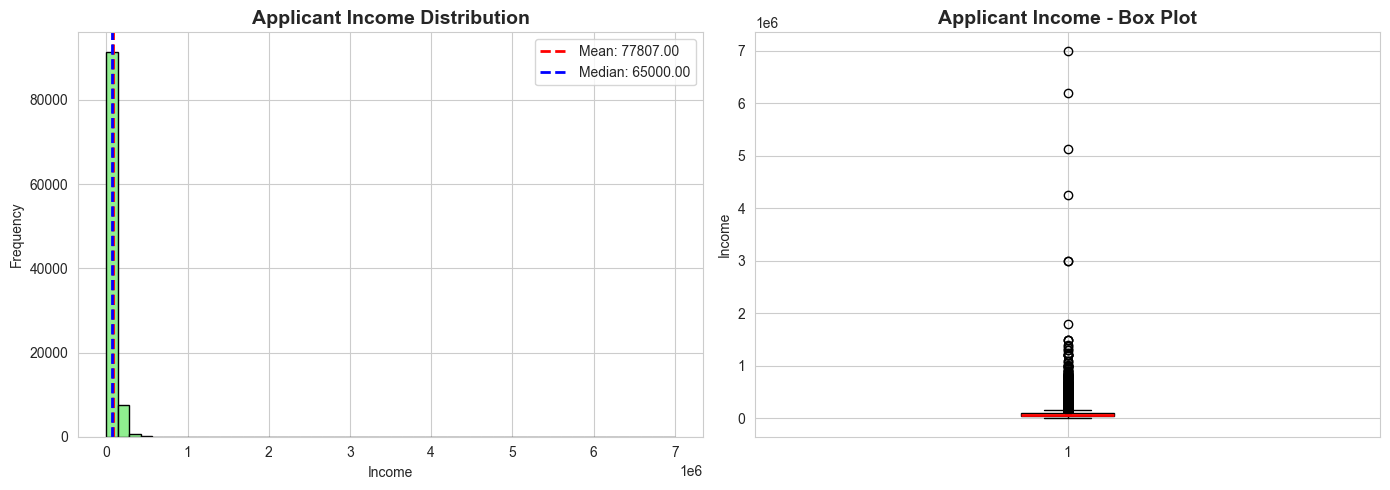

In [22]:
income_col = 'annual_inc' 

if income_col in df.columns:
    print("Applicant Income Statistics:")
    print(df[income_col].describe())
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df[income_col].dropna(), bins=50, color='lightgreen', edgecolor='black')
    axes[0].axvline(df[income_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[income_col].mean():.2f}')
    axes[0].axvline(df[income_col].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df[income_col].median():.2f}')
    axes[0].set_title('Applicant Income Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Income')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(df[income_col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Applicant Income - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Income')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{income_col}' not found. Available columns: {df.columns.tolist()}")

Applicant Installment Statistics:
count    9.999800e+04
mean     7.780700e+04
std      6.702646e+04
min      0.000000e+00
25%      4.600000e+04
50%      6.500000e+04
75%      9.300000e+04
max      6.998721e+06
Name: annual_inc, dtype: float64


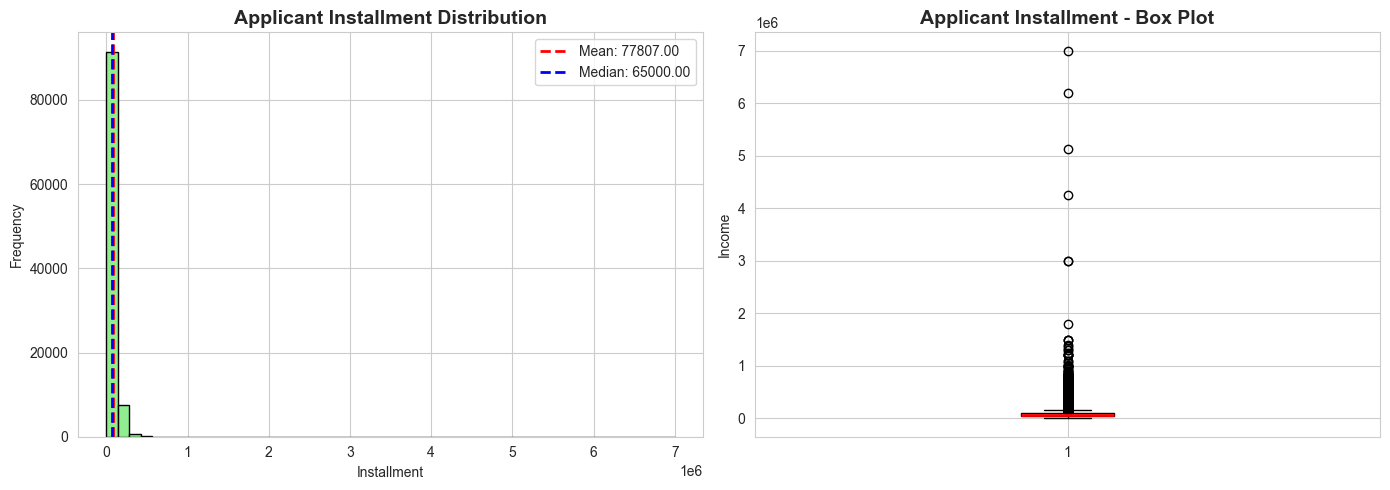

In [24]:
installment_col = 'installment' 

if income_col in df.columns:
    print("Applicant Installment Statistics:")
    print(df[income_col].describe())
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Histogram
    axes[0].hist(df[income_col].dropna(), bins=50, color='lightgreen', edgecolor='black')
    axes[0].axvline(df[income_col].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df[income_col].mean():.2f}')
    axes[0].axvline(df[income_col].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {df[income_col].median():.2f}')
    axes[0].set_title('Applicant Installment Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Installment')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Box plot
    axes[1].boxplot(df[income_col].dropna(), patch_artist=True,
                    boxprops=dict(facecolor='lightgreen'),
                    medianprops=dict(color='red', linewidth=2))
    axes[1].set_title('Applicant Installment - Box Plot', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Income')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{income_col}' not found. Available columns: {df.columns.tolist()}")

Loan Grade Distribution:
grade
B    29546
C    28449
A    19201
D    14365
E     6035
F     1809
G      594
Name: count, dtype: int64

Percentages:
grade
B    29.55
C    28.45
A    19.20
D    14.37
E     6.04
F     1.81
G     0.59
Name: proportion, dtype: float64


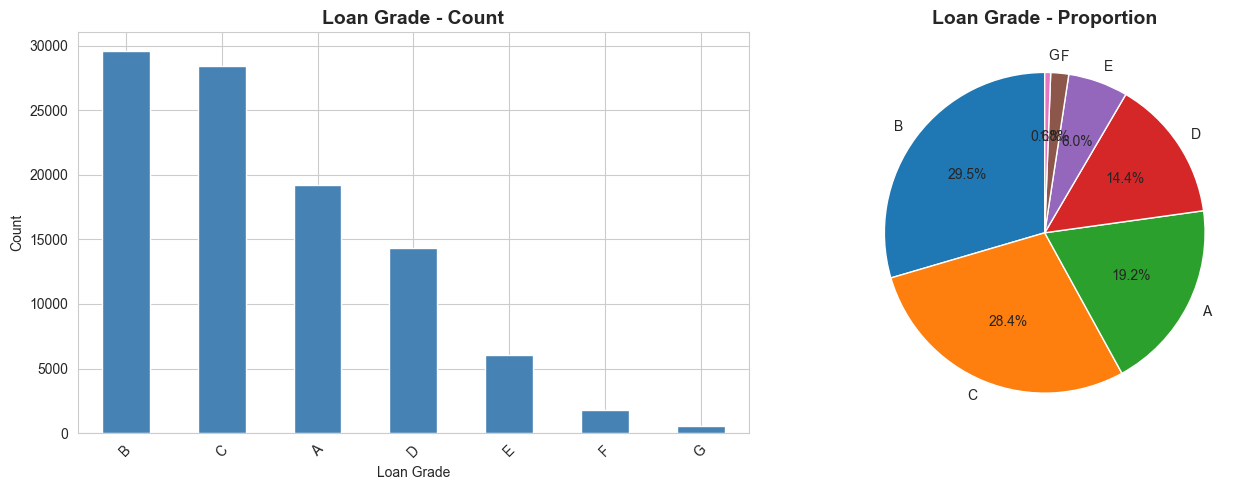

In [23]:
grade_col = 'grade'

if loan_status_col in df.columns:
    print("Loan Grade Distribution:")
    print(df[loan_status_col].value_counts())
    print("\nPercentages:")
    print(df[loan_status_col].value_counts(normalize=True).mul(100).round(2))
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Bar plot
    df[loan_status_col].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Loan Grade - Count', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Loan Grade')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)
    
    # Pie chart
    df[loan_status_col].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', startangle=90)
    axes[1].set_title('Loan Grade - Proportion', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('')
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Column '{loan_status_col}' not found. Available columns: {df.columns.tolist()}")

## 5. Summary of Findings

In [25]:
print("="*70)
print("INITIAL EDA SUMMARY")
print("="*70)

print(f"\n1. Dataset Size: {df.shape[0]:,} rows, {df.shape[1]} columns")
print(f"\n2. Missing Values: {df.isnull().sum().sum()} total ({(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%)")

if loan_status_col in df.columns:
    print(f"\n3. Loan Status: {df[loan_status_col].nunique()} unique values")
    
if interest_rate_col in df.columns:
    print(f"\n4. Interest Rate: Range [{df[interest_rate_col].min():.2f}, {df[interest_rate_col].max():.2f}], Mean: {df[interest_rate_col].mean():.2f}")
    
if income_col in df.columns:
    print(f"\n5. Applicant Income: Range [{df[income_col].min():.2f}, {df[income_col].max():.2f}], Mean: {df[income_col].mean():.2f}")

if installment_col in df.columns:
    print(f"\n6. Installment: Range [{df[installment_col].min():.2f}, {df[installment_col].max():.2f}], Mean: {df[installment_col].mean():.2f}")

if grade_col in df.columns:
    print(f"\n7. Loan Grade: {df[grade_col].nunique()} unique grades")
    print(f"Most common grade: {df[grade_col].mode()[0]} ({df[grade_col].value_counts().iloc[0] / len(df) * 100:.2f}%)")
          
print("\n" + "="*70)
print("✓ Initial EDA Complete!")
print("="*70)


INITIAL EDA SUMMARY

1. Dataset Size: 100,000 rows, 152 columns

2. Missing Values: 4795222 total (31.55%)

3. Loan Status: 7 unique values

4. Interest Rate: Range [5.31, 30.99], Mean: 13.10

5. Applicant Income: Range [0.00, 6998721.00], Mean: 77807.00

6. Installment: Range [15.67, 1714.54], Mean: 446.03

7. Loan Grade: 7 unique grades
Most common grade: B (29.55%)

✓ Initial EDA Complete!
